# Predicting heart disease using machine learning

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [7]:
df=pd.read_csv("heart_statlog_cleveland_hungary_final.csv")


## Data exploration(Exploratory Data Analysis)

In [9]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [12]:
df.target.value_counts()

target
1    629
0    561
Name: count, dtype: int64

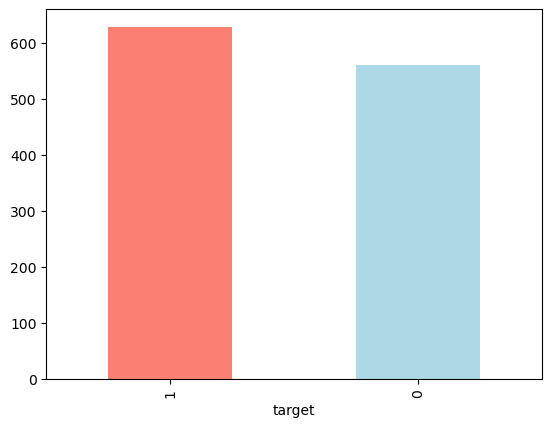

In [13]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

### Heart disease frequency according to sex

In [14]:
df.sex.value_counts()

sex
1    909
0    281
Name: count, dtype: int64

In [15]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,211,350
1,70,559


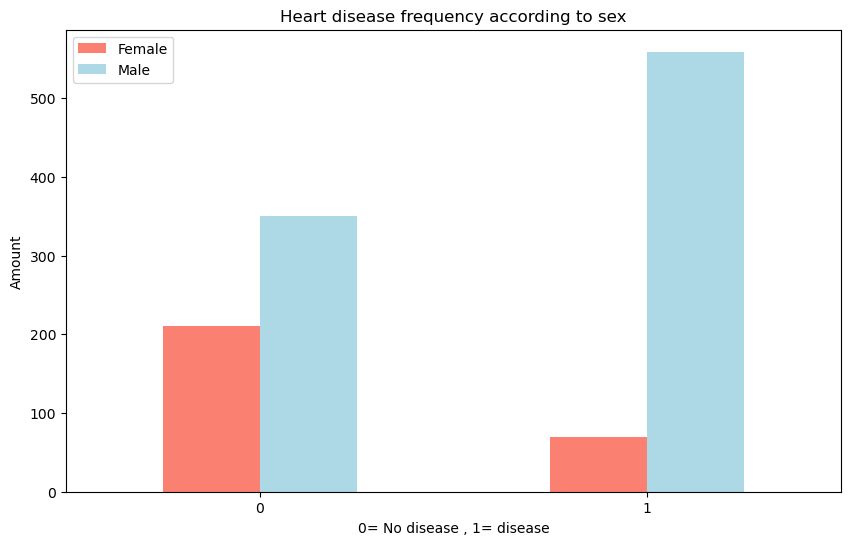

In [16]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"],
                                  title="Heart disease frequency according to sex",
                                  xlabel="0= No disease , 1= disease",
                                  ylabel="Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for heart disease

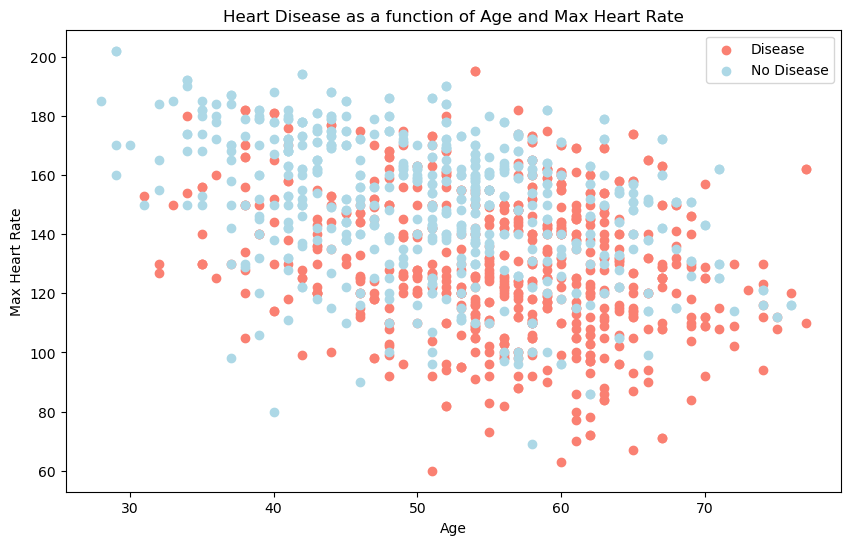

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
           df["max heart rate"][df.target==1],
           c="salmon")
plt.scatter(df.age[df.target==0],
           df["max heart rate"][df.target==0],
           c="lightblue")
plt.title("Heart Disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

### Heart Disease frequency per Chest Pain type

In [18]:
pd.crosstab(df.target,df["chest pain type"])

chest pain type,1,2,3,4
target,,,,
0,41,185,193,142
1,25,31,90,483


(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

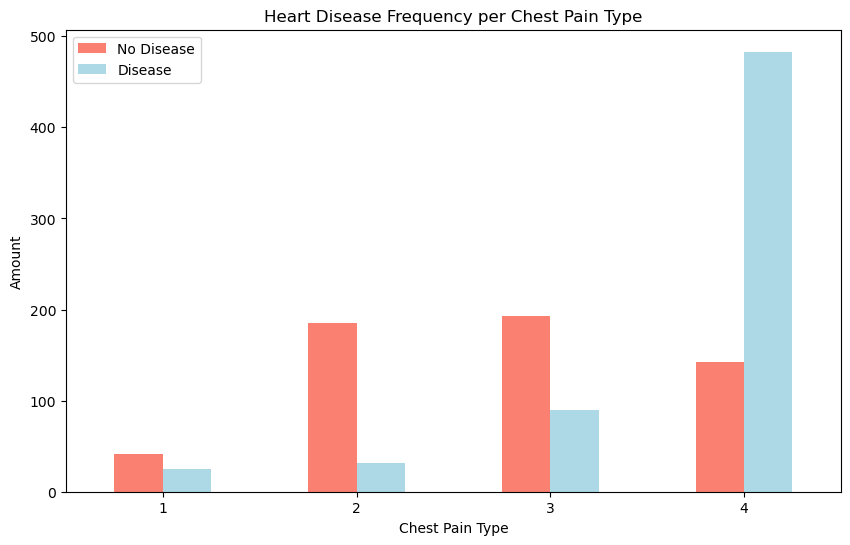

In [19]:
pd.crosstab(df["chest pain type"],df.target).plot(kind="bar",figsize=(10,6),
                                                 color=["salmon","lightblue"],
                                                 title="Heart Disease Frequency per Chest Pain Type",
                                                 xlabel="Chest Pain Type",
                                                 ylabel="Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

### Correlation between all imdependent variables 

In [20]:
corr_matrix=df.corr()
corr_matrix

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


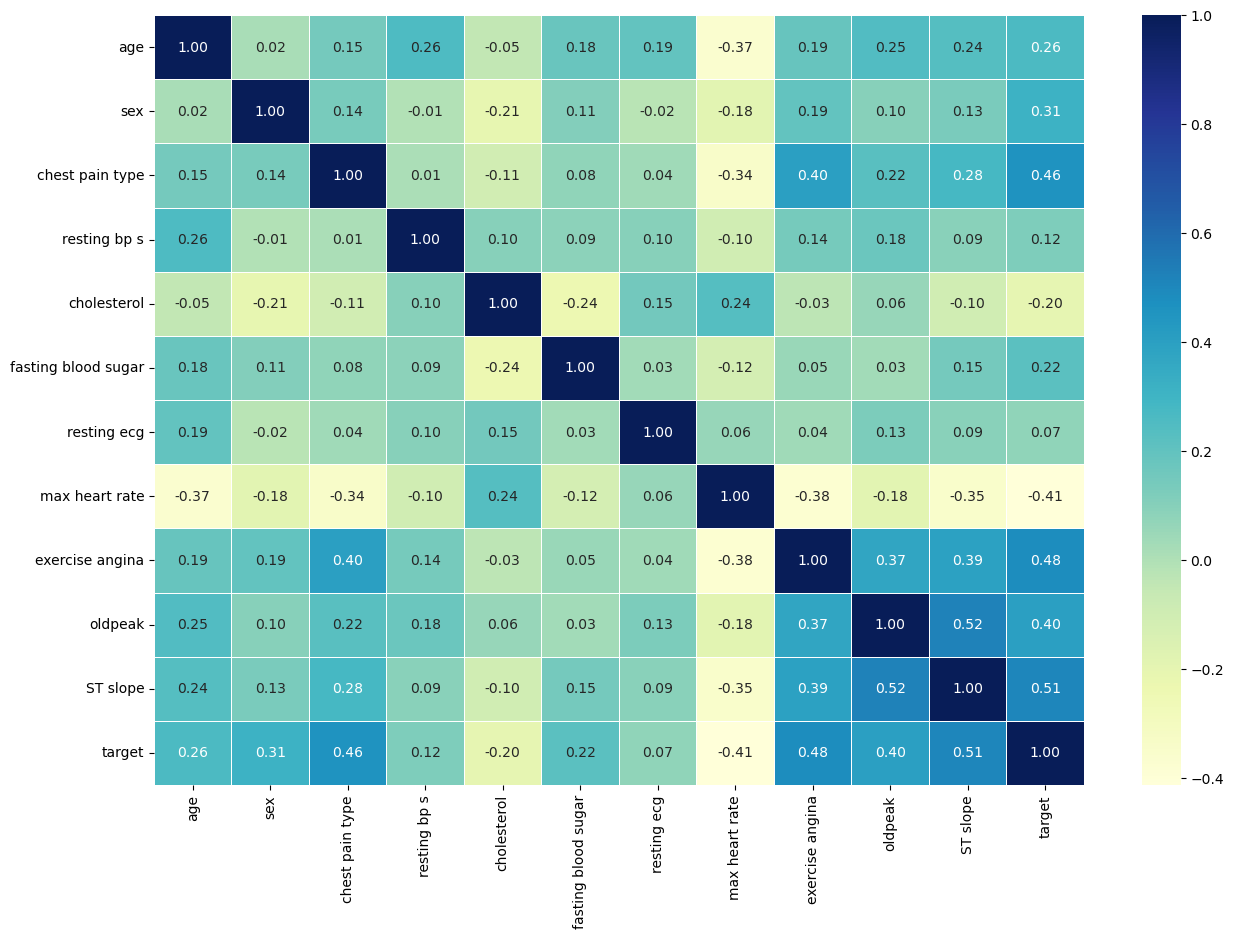

In [21]:
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

## Modelling

In [22]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [23]:
x=df.drop("target",axis=1)
y=df["target"]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
models={"Logistic Regression": LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

In [26]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [27]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\stile\project_1\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7857142857142857,
 'KNN': 0.680672268907563,
 'Random Forest': 0.8613445378151261}

<Axes: >

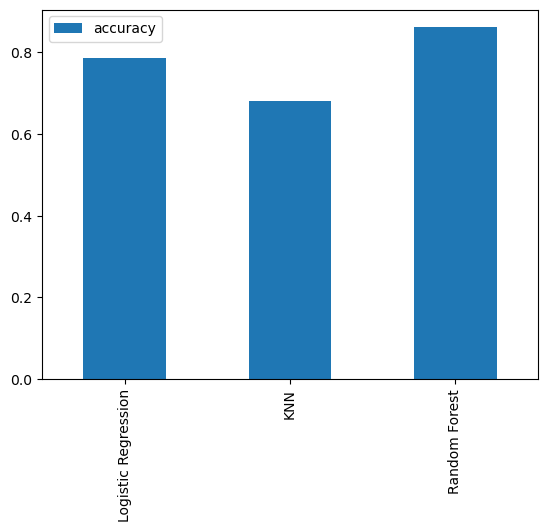

In [28]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

## Hyperparameter tuning and cross-validation

In [29]:
train_scores = []
test_scores = []

neighbors = range(1, 21) 

knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i) 
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))


In [30]:
train_scores

[1.0,
 0.9086134453781513,
 0.8823529411764706,
 0.8109243697478992,
 0.7993697478991597,
 0.7794117647058824,
 0.7846638655462185,
 0.7710084033613446,
 0.7794117647058824,
 0.7710084033613446,
 0.7678571428571429,
 0.7678571428571429,
 0.7668067226890757,
 0.773109243697479,
 0.7668067226890757,
 0.7647058823529411,
 0.7668067226890757,
 0.7636554621848739,
 0.7521008403361344,
 0.7542016806722689]

Maximum KNN score on the test data: 74.37%


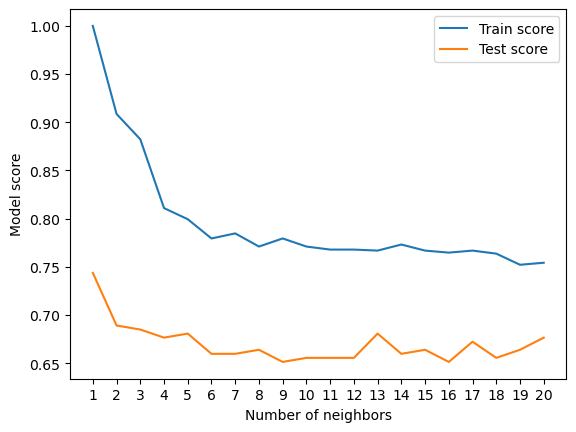

In [31]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning using RandomizedSearchCV

In [32]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [33]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [47]:
rs_log_reg.score(x_test, y_test)


0.7899159663865546

In [35]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [36]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [37]:
rs_rf.score(x_test, y_test)

0.8277310924369747

### Hyperparamter Tuning with GridSearchCV

In [38]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [39]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(x_test, y_test)

0.7899159663865546

In [41]:
y_preds = gs_log_reg.predict(x_test)

In [42]:
y_test

535    1
432    0
889    1
247    1
265    1
      ..
257    0
711    1
63     1
962    0
996    1
Name: target, Length: 238, dtype: int64

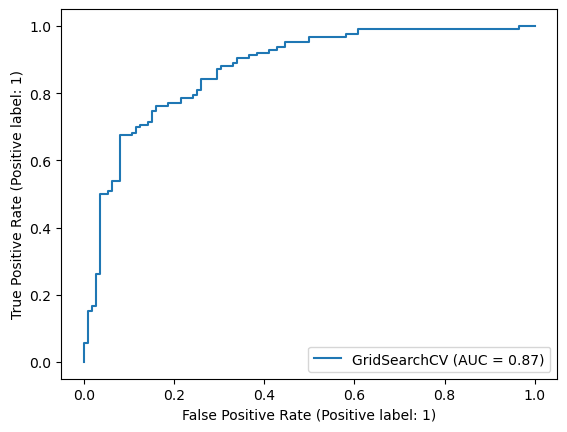

In [43]:
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [44]:
print(confusion_matrix(y_test, y_preds))

[[ 82  30]
 [ 20 106]]


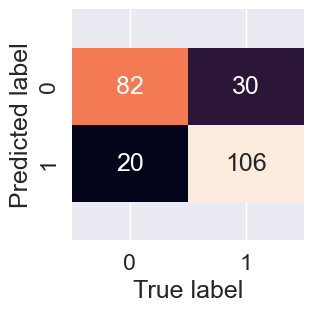

In [45]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt='g',
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       112
           1       0.78      0.84      0.81       126

    accuracy                           0.79       238
   macro avg       0.79      0.79      0.79       238
weighted avg       0.79      0.79      0.79       238

